LAB-3

สร้างและแสดงผล Decision Tree
วัตถุประสงค์: ทำความเข้าใจวิธีการสร้างและตีความ Decision Tree แบบพื้นฐาน

สิ่งที่ต้องทำ:

1.โหลดและเตรียมข้อมูล (ครั้งนี้ ไม่ต้องทำ Feature Scaling ซึ่งเป็นหนึ่งในข้อดีของ Tree-based model)

2.แบ่งข้อมูลเป็น Train/Test set

3.เทรนโมเดล DecisionTreeClassifier จาก scikit-learn

4.วัดค่า Accuracy

5.ขั้นตอนสำคัญ: ใช้ sklearn.tree.plot_tree เพื่อวาดรูปต้นไม้ที่เทรนเสร็จแล้วออกมาดู

ตอบคำถาม: จากรูปที่วาดได้ "คำถามแรก" ที่ Root Node ใช้ในการแบ่งข้อมูลคืออะไร?


In [43]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [44]:
import pandas as pd

ds = load_breast_cancer()
df = pd.DataFrame(data=ds.data, columns=ds.feature_names)
df['target'] = ds.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [45]:
from sklearn.metrics import accuracy_score

X = df.drop(columns='target')
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
y_pred = decision_tree_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'accuracy is : {accuracy}')

accuracy is : 0.9440559440559441


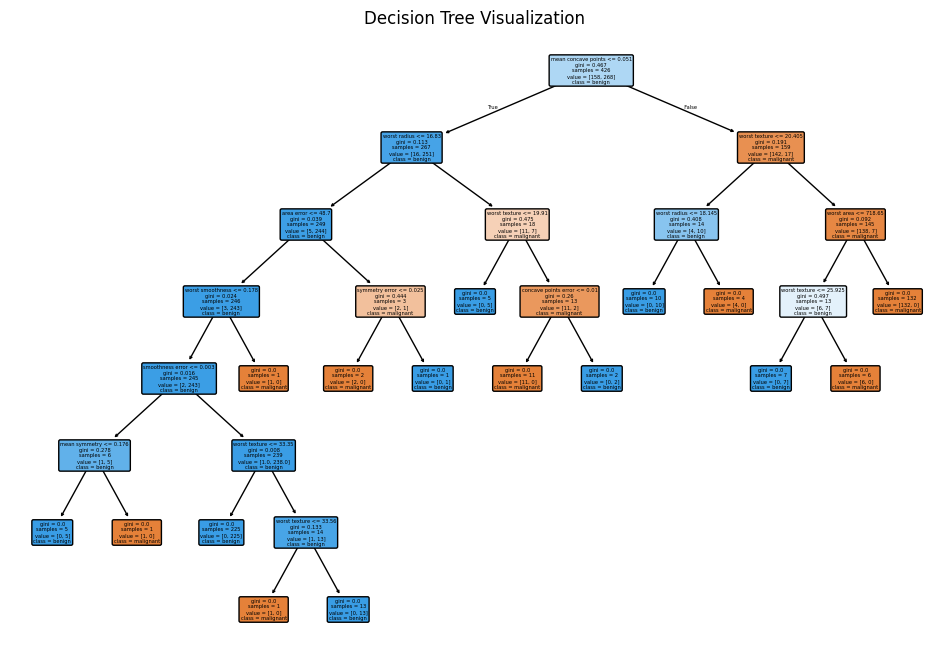

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(decision_tree_model, feature_names=ds.feature_names, class_names=ds.target_names, filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

Feature At root is : mean concave points

*** MEDIUM ***

ทำความเข้าใจปัญหา Overfitting ของ Decision Tree และเรียนรู้วิธีควบคุมผ่าน Hyperparameter max_depth

สิ่งที่ต้องทำ:

1.เทรน Decision Tree 2 โมเดล:

2.โมเดลที่ 1 (Full Tree): ไม่กำหนด max_depth (ปล่อยให้ต้นไม้โตเต็มที่)

3.โมเดลที่ 2 (Pruned Tree): กำหนด max_depth=4

4.สำหรับทั้ง 2 โมเดล ให้วัดค่า Accuracy ทั้งบน Train Set และ Test Set

5.เปรียบเทียบผลลัพธ์ (อินควรจะเห็นว่า Full Tree มี Accuracy บน Train Set สูงลิ่ว แต่บน Test Set อาจจะต่ำกว่า Pruned Tree)

ตอบคำถาม: อธิบายความแตกต่างของประสิทธิภาพระหว่าง 2 โมเดลนี้ โดยใช้แนวคิดเรื่อง Overfitting

In [47]:
tree_1 = DecisionTreeClassifier()
tree_2 = DecisionTreeClassifier(max_depth=4)

tree_1.fit(X_train,y_train)
tree_2.fit(X_train,y_train)

train_pred_1 = tree_1.predict(X_train)
train_pred_2 = tree_2.predict(X_train)

test_pred_1 = tree_1.predict(X_test)
test_pred_2 = tree_2.predict(X_test)

train_acc_1 = accuracy_score(y_train,train_pred_1)
train_acc_2 = accuracy_score(y_train,train_pred_2)

test_acc_1 = accuracy_score(y_test, test_pred_1)
test_acc_2 = accuracy_score(y_test, test_pred_2)

print(f'Train set Accuracy first tree : {train_acc_1}, Second tree : {train_acc_2}\nTest set Accuracy first tree : {test_acc_1}, Second tree : {test_acc_2}')


Train set Accuracy first tree : 1.0, Second tree : 0.9953051643192489
Test set Accuracy first tree : 0.958041958041958, Second tree : 0.9440559440559441


Decision Tree ต้นเเรกมี accuracy ที่เเปรปรวนเนื่องจากการที่ไม่จำกัดทำให้มันตั้งคำถามกับทุกๆ Feature ซึ่งนั่นอาจจะรวมกับ Noise ด้วยทำให้ใน Train set มันเก่งมาก เพราะมันจำได้ทุกๆ Pattern เเต่พอมันเจอ Test set มันอาจจะนำความเข้าใจผิดๆของมันมาตอบ ทำให้ Accuracy เเปรปรวน ส่วนเเบบกำหนด Max_depth มันจะเลือกคำถามที่ดีที่สุดใน n อันดับเเรกที่เราตั้งค่า ซึ่งมันทำให้โอกาสเจอ Noise เเละมีความเข้าใจผิดๆนั้นน้อยกว่า

*** HARD ***

สร้างโมเดล Random Forest และพิสูจน์ให้เห็นถึงประสิทธิภาพที่เหนือกว่า Decision Tree ต้นเดียว

สิ่งที่ต้องทำ:

1.เทรนโมเดล RandomForestClassifier (เช่น กำหนด n_estimators=100)

2.วัดค่า Accuracy บน Test Set

3.เปรียบเทียบ Accuracy ของ Random Forest กับ Decision Tree ทั้ง 2 แบบจาก Lab 2

4.ใช้ Attribute .feature_importances_ ของโมเดล Random Forest ที่เทรนเสร็จแล้ว เพื่อหาว่า Feature ใดมีความสำคัญที่สุด 5 อันดับแรกในการทำนายผล และนำไปพล็อตเป็น Bar chart

ตอบคำถาม: ทำไม Random Forest ถึงให้ผลลัพธ์ที่ดีกว่า Decision Tree ที่ดีที่สุดใน Lab 2? ให้อธิบายโดยอ้างอิงถึงหลักการ Bagging และ Feature Randomness

In [65]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100)

rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on Random forest classifier is : {accuracy}\nAccuracy on Decision Tree is : {test_acc_1} (No Max depth) and {test_acc_2} (Max depth = 4)')

feature_importance = rf_model.feature_importances_
n = len(feature_importance)
for i in range(n):
    swapped = False
    for j in range(n-i-1):
        if feature_importance[j] > feature_importance[j+1]:
            feature_importance[j], feature_importance[j+1] = feature_importance[j+1], feature_importance[j]
            swapped = True
    
    if (swapped == False):
        break

feature_importance = feature_importance[:-1]
print("Most 5 Feature importance:")
for i in range(5):
    print(f'{i+1}) {feature_importance[i]}')

Accuracy on Random forest classifier is : 0.965034965034965
Accuracy on Decision Tree is : 0.958041958041958 (No Max depth) and 0.9440559440559441 (Max depth = 4)
Most 5 Feature importance:
1) 0.003853393255944814
2) 0.003925465488707341
3) 0.004163750557852061
4) 0.004233802468102148
5) 0.004362587006140109


เหตุผลที่ Random Forest accuracy ดีกว่าเพราะมีหลายๆต้นไม้ที่ทำการ Baggy ถึงจะมีต้นไม้ที่อาจจะสนใจเเต่ Noise เเต่สุดท้ายการ Voting จะช่วยให้การทำนายออกมามีมาตรฐานไม่ Overfitting